# Overview

This week's curriculum is a little bit of a mixed bag. We'll cover 3 topics that are not super-related, but all are _very useful_ (and there is some connection between them). The overview is

* Tricks for raw text (chapter 3)
* Finding the important words in a document (TF-IDF)
* Sentiment analysis.

In the first part, we will take a quick tour of NLPP1e's chapter 3, which is boring, but an amazing ressource that you'll keep returning to. Then we'll talk about how we can use simple statistics & machine learning to get text to show us what it's all about. We will even do a little visualization. Finally, we'll jump to _sentiment analysis_. A topic which is pretty useless when it comes to wikipedia (because all wikipedia text is designed to be neutral), but which is highly useful elsewhere as we shall see (and since the course is all about teaching you stuff that's useful for the project and the rest of your lives, I'll get into it here. 

# Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP1e is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

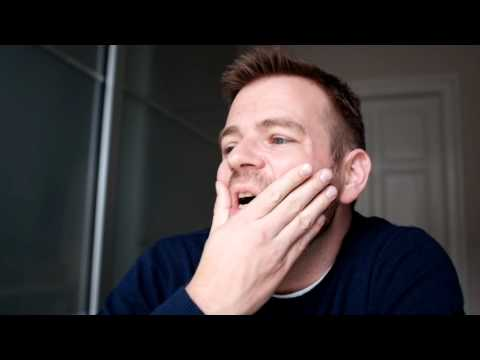

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> _Reading_: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key think is that you _know that Chapter 3 of this book exists_, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).
> 

> _Exercise_: Just a couple of examples from the book: Work through the exercises NLPP1e 3.12: 6, 30\.
> 

# Words that characterize the branches

In this section, we'll begin to play around with how far we can get with simple strategies for looking at text. The video is basically just me talking about a fun paper, which shows you how little is needed in order to reveal something very interesting about humans that produce text. Then, in the exercise (which is the main work you'll do today), we'll use a very simple weighting scheme called TF-IDF to find the important words within each branch of philosophy (according to wikipedia). In cleaning the wiki pages, we'll use some of the stuff you've just read about above. Finally, we'll even visualize them in a fun little word cloud (below is what I found for metaphysics).

![Metaphysics](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/List_of_metaphysicians.png)

> **Video lecture**: Simple methods reveal a lot. I talk a little bit about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

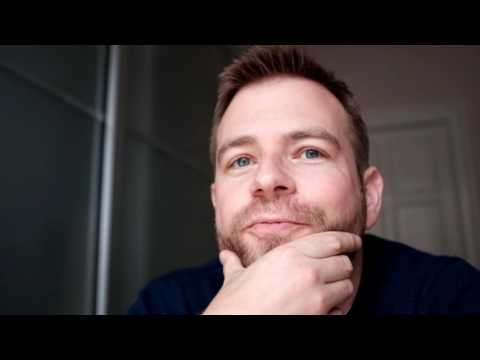

In [2]:
YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

 _Exercises_: TF-IDF and the branches of philosophy.
> 
> Setup. We want to start from a clean version of the philosopher pages with as little wiki-markup as possible. 
> We needed it earlier to get the links, etc, but now we want a readable version. We can get a fairly nice version directly
> from the wikipedia API, simply call `prop=extracts&exlimit=max&explaintext` instead of `prop=revisions` as we did earlier.
> This will make the API return the text without links and other markup. 
> 
> * Use this method to retrive a nice copy of all philosopher's text. You can, of course, also clean the existing pages using
> regular expressions, if you like (but that's probably more work).
> 
> The exercise.
> 
> * First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?
> * Since we want to find out which words are important for each _branch_, so we're going to create six large documents, one per branch of philosophy. Tokenize the pages, and combine the tokens into one long list per branch. Remember the bullets below for success.
>   * If you dont' know what _tokenization_ means, go back and read Chapter 3 again. This advice is valid for every cleaning step below.
>   * Exclude philosopher names (since we're interested in the words, not the names).
>   * Exclude punctuation.
>   * Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
>   * Exclude numbers (since they're difficult to interpret in the word cloud).
>   * Set everything to lower case.
>   * Note that none of the above has to be perfect. It might not be easy to remove _all_ philosopher names. And there's some room for improvisation. You can try using stemming. In my own first run the results didn't look so nice, because some pages are very detailed and repeat certain words again and again and again, whereas other pages are very short. For that reason, I decided to use the unique set of words from each page rather than each word in proportion to how it's actually used on that page. Choices like that are up to you.
> * Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within each branch. 
>   * Describe similarities and differences between the branches.
>   * Why aren't the TFs not necessarily a good description of the branches?
> * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?
> * We're ready to calculate TF-IDF. Do that for each branch. 
>   * List the 10 top words for each branch.
>   * Are these 10 words more descriptive of the branch? If yes, what is it about IDF that makes the words more informative?
> * Normally, TF-IDF is used for single documents. What does TF-IDF tell us about the content of a single document in a collection.
> 

### The word cloud. 

The most difficult thing about the word cloud exercise is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

If you're lucky, you can simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c https://conda.anaconda.org/amueller wordcloud
 
If you can't get that to work, maybe the comments below are helpful: 
 * The module depends on the Python library PIL. Use `conda` to install that before you do anything else.
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip` just as when you installed the communities library a few weeks ago. 
 * There are examples of how to use the module online, see [here](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) and [here](https://bioinfoexpert.com/2015/05/26/generating-word-clouds-in-python/). If you're interested, you can read about how the package was put together [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

_Exercises (word-cloud edition)_
 
> * The package needs a string to work on. The way that I converted my TF-IDF results to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its TF-IDF score (rounded up to the nearest integer value). 
> * Now, create word-cloud for each branch of philosophy. Feel free to make it as fancy or non-fancy as you like. Comment on the results.
> 

# Sentiment Analysis

Sentiment analysis is another highly useful technique. It doesn't tie in strongly with our work on Wikipedia (more on that in the video), but we'll go through it here because experience shows that sentiment analysis might well be very useful when you get to the project stage of the class.

> **Video Lecture**: Uncle Sune talks about sentiment and his own youthful adventures.

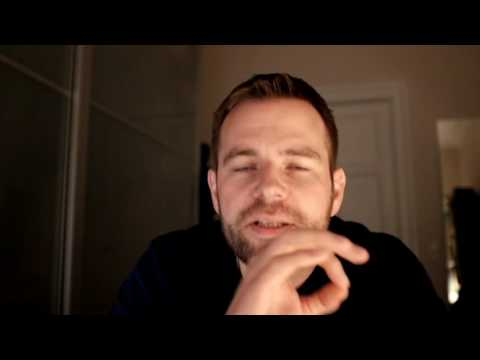

In [3]:
YouTubeVideo("JuYcaYYlfrI",width=800, height=450)

> Reading: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) 

> Exercise, sentiment over some books from NLPP1e
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc). The function should complain if there are no words with sentiment attached.
> * Calculate a sentiment profile for the novels in NLPP1e chapter 1\. The sentiment profile has sentiment on the _y_-axis and position in the text on the _x_-axis. Use a [moving average](https://en.wikipedia.org/wiki/Moving_average) to show how the sentiment changes. Create profiles for sliding windows of length 15 words, 50 words, 100 words, 500 words.
> * Comment on the sentiment profiles. Do they show a similar pattern? What is the effect of changing the size of the sliding window?
>